In [7]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import cv2

import os

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [3]:
dataset_path = 'E:/Jupyter Notebook/DL Tutorial/Dog Cat Classifier/Dataset/training_set'

In [4]:
images = []
labels = []
for i in ['dogs', 'cats']:
    folder_path = os.path.join(dataset_path,str(i))

    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path,str(file))
        image = cv2.imread(image_path)
        if image is None:
            print(f"Skipping invalid image: {image_path}")
            continue
        image = cv2.resize(image,(224,224))
        images.append(image)
        if i == 'dogs':
            labels.append(0)
        else:
            labels.append(1)
images = np.array(images, dtype=np.float32) / 255.0
labels = np.array(labels)

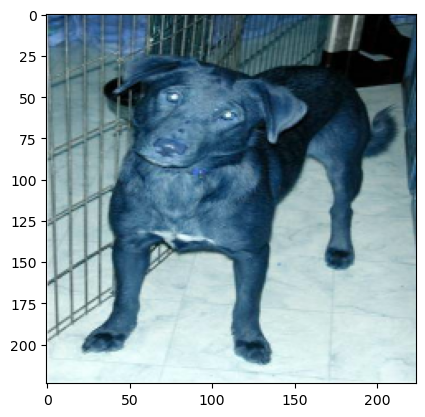

0


In [5]:
plt.imshow(images[0])
plt.show()
print(labels[0])

In [6]:
features_train, features_test, target_train, target_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=2)
print(images.shape,features_train.shape,features_test.shape)
print(labels.shape,target_train.shape,target_test.shape)

(1008, 224, 224, 3) (806, 224, 224, 3) (202, 224, 224, 3)
(1008,) (806,) (202,)


In [19]:
model = keras.Sequential([
    keras.layers.Input(shape=(224,224,3)),
    keras.layers.Rescaling(1./255),

    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    features_train,
    target_train,
    validation_split=0.2,
    epochs=10
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.4922 - loss: 0.6950 - val_accuracy: 0.4568 - val_loss: 0.6933
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step - accuracy: 0.5109 - loss: 0.6931 - val_accuracy: 0.4568 - val_loss: 0.6935
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 372ms/step - accuracy: 0.5109 - loss: 0.6930 - val_accuracy: 0.4568 - val_loss: 0.6937
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step - accuracy: 0.5109 - loss: 0.6930 - val_accuracy: 0.4568 - val_loss: 0.6939
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 377ms/step - accuracy: 0.5109 - loss: 0.6930 - val_accuracy: 0.4568 - val_loss: 0.6941
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 340ms/step - accuracy: 0.5109 - loss: 0.6930 - val_accuracy: 0.4568 - val_loss: 0.6942
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 377ms/step - accuracy: 0.5109 - loss: 0.6929 - val_accuracy: 0.4568 - val_loss: 0.6944
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 348ms/step - accuracy: 0.5109 - loss: 0.6929 - val_accuracy: 0.